# Recognizing dogs and cats

The purpose of this laboratory is to build a first end to end reflex-based AI model to teach computers to [**understand images**](https://www.ted.com/talks/fei_fei_li_how_we_re_teaching_computers_to_understand_pictures).

In particular, the objective of this lab is to write an AI application able to recognize cats and dogs on images. Your application will take an image as input and will be able to say wheter the image contains a dog or a cat. You will work with the data of the [**Dogs vs Cats**](https://www.kaggle.com/c/dogs-vs-cats) competition from Kaggle. This competition was launched in 2013 and the first place was obtained by [Pierre Sermanet](https://research.google.com/pubs/PierreSermanet.html), actually Research Scientist at Google Brain, by using the [Overfeat](http://cilvr.nyu.edu/doku.php?id=software:overfeat:start#overfeatobject_recognizer_feature_extractor) deep learning library he wrote during his PhD at New York University under the supervision of [Yann Le Cun](http://yann.lecun.com/), Director of AI Research at Facebook. He obtained $1.09%$ of classification errors. Try to do your best to approach this score!!!

Two approaches will be used to adress this problem :
1. A traditional pattern recognition model in which hand-crafted features are extracted from images and used to represent them and to train classifiers.
2. A modern representation learning approach in which deep convolutional neural networks (CNN) are used to learn the image representations.

 

##  Learning outcomes
+ Building an end to end supervised machine learning pipeline : input data (training set) preparation, training (model learning), validation sets, cross-validation, hyper-parameter tuning, evaluation on the testing dataset.
+ Getting familiar with deep learning for image classification : model building and training, transfer learning, fine-tuning.
+ Getting familiar with some well-known librairies:
    + Machine learning : Scikit-learn ([http://scikit-learn.org/stable/](http://scikit-learn.org/stable/))
    + Deep learning: Keras ([https://keras.io/](https://keras.io/))
    + Computer vision : Scikit-image ([http://scikit-image.org/](http://scikit-image.org/) or OpenCV ([http://opencv.org/](http://opencv.org/))
    
**The final objective of this laboratory is to be aware to the potential but also to the limitations of reflex-based AI approaches towards visual recognition tasks.**
    

## Part 0 : Requirements
A set of packages will be useful to handle the first part of this study case.

    pip install -r requirements.txt

In [2]:
# !pip install -r requirements.txt

## Part 1 : A small tutorial on image classification

In this section, we will briefly introduce the image classification problem which consists in assigning to an input image one label from a fixed set of labels and which is one of the big challenge of computer vision and artifial intelligence. In our case, we will only consider two labels $\{dog, cat\}$. This small tutorial also aims at familiarizing you with machine learning and computer vision librairies that we will used in this course :
+ Scikit-Learn : [http://scikit-learn.org/stable/](http://scikit-learn.org/stable/)
+ OpenCV : [http://opencv.org/](http://opencv.org/) or Scikit-image ([http://scikit-image.org/](http://scikit-image.org/)).

![ImageCat](images/Diapositive1.jpg)

While the task of image classification is very easy for a human, we have to face with several challenge to build our automatic recognition algorithm among whom:

+ Viewpoint variation.
+ Scale variation.
+ Illumination conditions variation.
+ Deformation.
+ Occlusion.
+ Backgroud clutter.
+ Intraclass variation.

![ImageCatwithvariations](./images/Diapositive2.jpg)

![ImageCatwithocclusion](./images/Diapositive3.jpg)

Source : Images from the CS231n course of Stanford (Convolutional Neural Networks for Visual Recognition)












### A simple image classification pipeline

To built our image classification algorithm, we will follow the principle of a machine learning approach for image classification which consists in :
1. Collecting and preparing a dataset of images and their corresponding labels.
2. Using a machine learning algorithm to train a classifier.
3. Evaluate the classifier on new images.


![ImageClassificationpipeline](images/testphase.png)

#### Having a look on the available data

First, you have to  download the dataset that will be used to train and test our model. Before downloading the data, create a subdirectory in your working folder called data. Then download [DataDogsCatsChallenge.zip](https://filesender.renater.fr/?s=download&token=73e7d488-3aa8-43d5-a028-ed6f2e62f61a) into that directory and unzip it. This dataset contains 25,000 labelled dog and cat photos available for training, and 12,500 in the test set that we have to try to label for the Kaggle competition.

As we have seen in the lecture note, the standard practice in machine learning is to split the available data into at least two different subsets :
+ The **training set** : to learn the model.
+ The **testing set** : to evaluate the learned model.

You have also seen that is the also standard to add a third set to the split to build a **validation set** that will be used to fine-tune the parameters of the model.

I you have a look on the DogsCatsChallenge directory, you will see that the preparation of the data have been done and that the test and train sets are in separate subdirectories in which data for each category (cats and dogs) is also into subdirectories. Nevertheless, there is no validation set and one of your first task will be to build it.

The archive also contains a directory named **sample**. Training and validating the entire dataset can take some time. Therefore, it is a good practice to run first your algorithm on a small sample of your training and validation data before to run it on the entire set of data.


##### Image representation

Your first task will be to built a representation of the data, i.e. a feature vector which values quantify the contents of the image. We will see latter that, using Deep Convolutional Neural Networks, we can learn an efficient representation directly using raw pixel intensities as inputs. Here, we will just represent the images by two alternative representations.
+ A first representation is built using the raw data by simply resizing an input image to a fixed size (here $32 \times 32$ pixels) and then by flattening the RBG pixel intensities into a single vectors of numbers.
+ A second representation is built from the color histogram that characterizes the color distribution of the image. For this representation a color conversion into the HSV color space could be useful.

**Complete the functions below to build such representations**

Some helping functions :
+ With Numpy:
    + [Array flattening](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.flatten.html)
    
+ With OpenCV:

     + [Geometric transformations on images](http://docs.opencv.org/trunk/da/d6e/tutorial_py_geometric_transformations.html) 
     + [Colorspace conversion](http://docs.opencv.org/trunk/df/d9d/tutorial_py_colorspaces.html) 
     + [Histogram in OpenCV](http://docs.opencv.org/trunk/de/db2/tutorial_py_table_of_contents_histograms.html)
    
+ With Scikit-image :
    + [Loading an image from a file](https://scikit-image.org/docs/stable/user_guide/data_types.html)
    + [Image transformations](https://scikit-image.org/docs/dev/user_guide/transforming_image_data.html)
    + [Colorspace conversion](https://scikit-image.org/docs/dev/user_guide/transforming_image_data.html#color-manipulation)
     
    

Apply the following code.

In [1]:
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import imutils
import cv2 as cv
import os

In [2]:
import os
dirname = os.path.dirname("__file__")
filename = os.path.join(dirname, 'data/DogCatChallenge/sample/train/cats/cat.394.jpg')
src = cv.imread(filename, cv.IMREAD_UNCHANGED)
print(src)
# cv.imshow('Source image',src)
# cv.waitKey(0)
# cv.destroyAllWindows()

[[[180 202 207]
  [180 202 207]
  [180 202 207]
  ...
  [206 218 222]
  [206 218 222]
  [206 218 222]]

 [[180 202 207]
  [180 202 207]
  [180 202 207]
  ...
  [206 218 222]
  [206 218 222]
  [206 218 222]]

 [[180 202 207]
  [180 202 207]
  [180 202 207]
  ...
  [206 218 222]
  [206 218 222]
  [206 218 222]]

 ...

 [[132 123 143]
  [125 116 136]
  [135 126 146]
  ...
  [126 109 123]
  [ 92  75  89]
  [105  88 102]]

 [[142 133 153]
  [146 137 157]
  [165 156 176]
  ...
  [140 123 136]
  [106  89 102]
  [119 102 115]]

 [[155 146 166]
  [164 155 175]
  [185 176 196]
  ...
  [139 125 137]
  [108  94 106]
  [124 110 122]]]


In [3]:
# TO DO : complete other import modules
def image_to_feature_vector(image, size=(32, 32)):
    # resize the image to a fixed size, then flatten the image into a list of raw pixel intensities of length 32*32*3
    #img = np.reshape(image, size)
    img = cv.resize(image, size)
    res = img.flatten() #flat vector of length 32*32*3 (rgb pixels)
    return res



### Wrong format for the output vector ???

def build_HSV_color_histogram_vector(image,bins=(8, 8, 8), show = False):
    # extract a 3D color histogram from the HSV color space using the supplied number of `bins` per channel and return it as a feature vector
    # Length of the vector : 3 colors * 8 bins per color = 24
    #hsv = cv.cvtColor(image,cv.COLOR_BGR2HSV)
    hist_list = []
    for (i, color) in enumerate(['r','g','b']):
        hist = cv.calcHist([image],[i],None,[bins[i]],[0,256])
        hist_clean = [int(x[0]) for x in hist]
        hist_list.extend(hist_clean)
        if show :
            plt.plot(hist, color)
            plt.xlim([0,bins[0]]) 
    # print(hist_list)  
    return np.array(hist_list)

In [6]:
# a = image_to_feature_vector(src)
# print(len(a))
# a
b = build_HSV_color_histogram_vector(src,bins=(8, 8, 8), show = False)
print(len(b))
b
# print(cv.cvtColor(src,cv.COLOR_BGR2HSV))

24


array([10010, 23436, 29142, 20479, 11675, 29289, 38678,  3291,  6950,
       23069, 24290, 24083, 16442, 10116, 53539,  7511,  1449, 16741,
       18544, 29398, 21590, 13738, 54717,  9823])

#### Dataset prepatation and feature extraction
The dataset has to be prepared for feature extraction :
+ Three lists will be initialized to store the raw pixel representation, the color distribution (histogram) representation and the class labels themselves.
+ Then, the lists will be completed by extracted the features from the dataset (don't forgot to begin by testing your program on the sample dataset before to apply it on the whole dataset).

For this step, we can used the paths.py file [here](https://github.com/jrosebr1/imutils/blob/master/imutils/paths.py)




In [7]:
from paths import *



print("Describing images...")
imagePaths = list(list_images('./data/DogCatChallenge/sampleDeep'))

# initialize the raw pixel intensities matrix, the features matrix and labels list
rawImages_features = []
histogram_features = []
labels = []



for i in range(len(imagePaths)):
    if (i+1) % 200 == 0:
        print(f"{i+1}/{len(imagePaths)}")
    path = imagePaths[i]
    img = cv.imread(path)
    rawImages_features.append(image_to_feature_vector(img))
    histogram_features.append(build_HSV_color_histogram_vector(img))
    label_name = (path.split("\\")[-1]).split(".")[0]
    label = 0 if label_name == 'cat' else 1
    labels.append(label)

rawImages_features = np.array(rawImages_features)
# print(rawImages_features.shape)
labels = np.array(labels)
# print(labels.shape)
histogram_features = np.array(histogram_features)
# print(histogram_features.shape)


Describing images...
200/2800
400/2800
600/2800
800/2800
1000/2800
1200/2800
1400/2800
1600/2800
1800/2800
2000/2800
2200/2800
2400/2800
2600/2800
2800/2800


#### Dataset splitting into training and validation dataset

The last common step in machine learning will be to split the training dataset into training dataset and validation dataset. For this, you could use some functions from scikit-learn :

  + [Cross validation](http://scikit-learn.org/stable/modules/cross_validation.html)
    
    
 In our case, the split of the dataset into training, validation and test set has been done but you can try to build another sample dataset using the fonctions of scikit-learn. In particular, if you are note familiar to **cross validation**, take the time to read carefully the previous documentation.

In [9]:
from sklearn.model_selection import train_test_split

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(rawImages_features, labels, test_size=0.2, random_state=0)
X_train_hsv, X_test_hsv, y_train_hsv, y_test_hsv = train_test_split(histogram_features, labels, test_size=0.2, random_state=0)

#### Classification using the K-Nearest Neighbor (k-NN) classifier


In order to build this simple image classification pipeline, you will use the k-Nearest Neighbor (k-NN) classifier which is a very simple machine learning/image classification approach, rarely used in practice but its simplicity will enable you to get quickly an idea of the image classification pipeline.

The principle of the [k-NN classifier](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) can be summarize by the following principle : “Tell me who your neighbors are, and I’ll tell you who you are”. Given an unknown image and a training dataset, the k-NN classifier will compare this image to every single image of the training dataset and will predict the label by finding the most common class among the k-closest examples.

Thus to apply the k-nearest Neighbor classification, we need to define a distance metric or a similarity function. For the sake of simplicity, here we will consider the euclidian distance but other distances can be used according to the targeted type of data.

$d(\mathbf{p},\mathbf{q})=\sqrt{\sum_{i=1}^{N}(q_i-p_i)^2}$

with $\mathbf{p}$ and $\mathbf{q}$ two data vectorial representations.

You can now train and predict a k-Nearest Neighbor classifier on your different splits. Once again, we suggest you to have a look on the scikit-learn documentation :
+ [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
+ [Example](http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py)
+ [An introduction to machine learning with scikit-learn](http://scikit-learn.org/stable/tutorial/basic/tutorial.html#learning-and-predicting)


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def knn_train_eval(X_train, X_test, y_train, y_test):
    knn_clf = KNeighborsClassifier()
    # print(X_train.shape)
    knn_clf.fit(X_train,y_train)
    pred = knn_clf.predict(X_test)
    acc = accuracy_score(y_test,pred)
    print(f"Accuracy : {acc}")

# training and evaluation of a k-NN classifer on the raw pixel representation
print("Raw pixel representation")
knn_train_eval(X_train_raw, X_test_raw, y_train_raw, y_test_raw)

# training and evaluation of  a k-NN classifer on the color histogram representation
print("Color histogram representation")
knn_train_eval(X_train_hsv, X_test_hsv, y_train_hsv, y_test_hsv)

Raw pixel representation
Accuracy : 0.5446428571428571
Color histogram representation
Accuracy : 0.5410714285714285


**Take the time to compare and to discuss with the others your obtained score !**

#### Validation sets for Hyperparameter tuning

The k-nearest neighbor classifier requires a setting for k. What value have you chosen?  How ? Another parameter of this classifier is the choice of the distance functions we could have used. These choices are called **hyperparameters** and their setting is one of the main issue of the design of many Machine Learning algorithms.

To choose these hyperparameter values, the principle is to try out many different values and to see what works best. The main question is on which data ? On the test set ? On the training set ? In fact, the idea is to split your training set in two: a slightly smaller training set, and what we call a **validation set** as explained in the course.

The scikit-learn library has two methods that can perform hyperparameter search and optimization: **Grid search** and **Randomized Search**. Let's have a look on their documentations :
 + [Tuning the hyper-parameters of an estimator](http://scikit-learn.org/stable/modules/grid_search.html)
 
 
You will now apply these two methods to tune the hyperparameters of our k-NN classifier :
 1. First, define a dictionary of parameters which contains two keys :
     + `n_neighbors` the number of nearest neighbors $k$ in the k-NN algorithm that we will vary in the range $[1, 29]$ (if your sample dataset is sufficient)
     + `metric` the distance function/similarity metric for k-NN that can be either the Euclidean distance either the Manhattan/City block distance.
 2. Then, apply Grid Search and Randomized Search



In [11]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import time

print("Building training/testing split...\n")

params = {"n_neighbors": np.arange(1, 29, 1),"metric": ["euclidean", "cityblock"]}

knn_clf = KNeighborsClassifier()

def param_tuning(search_type, data_type, params):
    if search_type == "grid":
        clf = GridSearchCV(knn_clf,params,scoring = "accuracy", n_jobs = -1, verbose = 5)
    else:
        clf = RandomizedSearchCV(knn_clf,params,scoring = "accuracy", n_jobs = -1, verbose = 5)
    start = time.time()
    if data_type == "raw":
        X_train, X_test, y_train, y_test = X_train_raw, X_test_raw, y_train_raw, y_test_raw
        clf.fit(X_train, y_train)
    else:
        X_train, X_test, y_train, y_test = X_train_hsv, X_test_hsv, y_train_hsv, y_test_hsv
        clf.fit(X_train, y_train)

    # print the time and the obtained best parameters
    print(f"Hyperparamter tuning time : {time.time() - start}")
    print(f"Best parameters : {clf.best_params_}")

    # evaluate the best grid searched model on the testing data 
    acc = clf.score(X_test, y_test)
    print(f"Accuracy score for {search_type}searchCV and {data_type} data : {acc} \n")

# tune the hyperparameters via a cross-validated grid search of the KNN classifier on raw features
print("Tuning hyperparameters via grid search on raw features")
param_tuning("grid", "raw", params)

# tune the hyperparameters via a cross-validated randomized search of the KNN classifier on raw features
print("Tuning hyperparameters via randomized search on raw features")
param_tuning("random", "raw", params)

# tune the hyperparameters via a cross-validated grid search of the KNN classifier on histo features
print("Tuning hyperparameters via grid search on histo features")
param_tuning("grid", "hsv", params)

# tune the hyperparameters via a cross-validated randomized search of the KNN classifier on raw features
print("Tuning hyperparameters via randomized search on histo features")
param_tuning("random", "hsv", params)

Building training/testing split...

Tuning hyperparameters via grid search on raw features
Fitting 5 folds for each of 56 candidates, totalling 280 fits
Hyperparamter tuning time : 117.79746007919312
Best parameters : {'metric': 'cityblock', 'n_neighbors': 19}
Accuracy score for gridsearchCV and raw data : 0.5821428571428572 

Tuning hyperparameters via randomized search on raw features
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Hyperparamter tuning time : 27.56368613243103
Best parameters : {'n_neighbors': 15, 'metric': 'cityblock'}
Accuracy score for randomsearchCV and raw data : 0.5589285714285714 

Tuning hyperparameters via grid search on histo features
Fitting 5 folds for each of 56 candidates, totalling 280 fits
Hyperparamter tuning time : 2.045844078063965
Best parameters : {'metric': 'cityblock', 'n_neighbors': 25}
Accuracy score for gridsearchCV and hsv data : 0.5875 

Tuning hyperparameters via randomized search on histo features
Fitting 5 folds for each of

#### Cross-validation

Sometimes, the size of your training data (and therefore also the validation data) is small and, in this case, the technique used for hyperparameter tuning is **cross-validation**. The main principle is to iterate over different validation sets and to average the performance across these. For example, in a 5-fold cross-validation, we split the training data into 5 equal folds, use 4 of them for training, and 1 for validation. We would then iterate over which fold is the validation fold, evaluate the performance, and finally average the performance across the different folds.

The scikit-learn library has also methods for this kind of cross validation :
+ [Cross-validation: evaluating estimator performance](http://scikit-learn.org/stable/modules/cross_validation.html#)

Here, you will just apply  **m-fold cross validation**. In particular, you have to write a 10-fold cross-validation run for the parameter k of our k-NN algorithm on the training dataset. You will just consider old value of $k$ on the range $[1,29]$


 10-fold cross validation on the KNN classifier with raw features
Optimal number of neighbours : 15 with a score of 0.5651785714285714
Plotting the misclassification error versus k


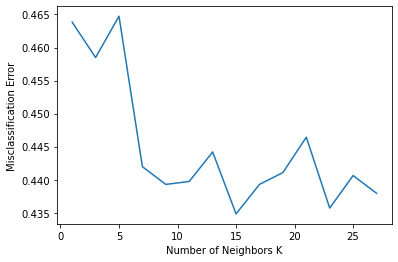

 10-fold cross validation on the KNN classifier with hsv features
Optimal number of neighbours : 25 with a score of 0.5316964285714285
Plotting the misclassification error versus k


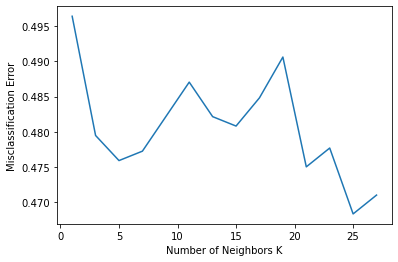

In [12]:
from sklearn.model_selection import cross_val_score


def cv_opti_k(data_type):
    # creating odd list of K for KNN
    params = {"n_neighbors": np.arange(1, 29, 2)}

    # empty list that will hold cv scores
    cv_scores = []

    # perform 10-fold cross validation on the KNN classifier with raw features
    print(f" 10-fold cross validation on the KNN classifier with {data_type} features")

    if data_type == "raw":
        X_train, X_test, y_train, y_test = X_train_raw, X_test_raw, y_train_raw, y_test_raw
    else:
        X_train, X_test, y_train, y_test = X_train_hsv, X_test_hsv, y_train_hsv, y_test_hsv

    opti_k = 0
    max_score = 0
    for k in params["n_neighbors"]:
        clf = KNeighborsClassifier(n_neighbors = k)
        scores = cross_val_score(clf, X_train,y_train,cv = 10)
        score = scores.mean()
        cv_scores.append(score)

        # determining best k
        if score > max_score:
            opti_k = k
            max_score = score
    print(f"Optimal number of neighbours : {opti_k} with a score of {max_score}")

    print("Plotting the misclassification error versus k")
        
    # changing to misclassification error
    MSE = [1 - x for x in cv_scores]

    # plot misclassification error vs k
    plt.plot(params["n_neighbors"], MSE)
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('Misclassification Error')
    plt.show()


cv_opti_k("raw")
cv_opti_k("hsv")


#### Summary of Part 1

    
Introduction of the problem of **Image Classification**
Introduction and building of a **first simple classifier: the k-NN classifier**.</span> As seen, this classifier is very simple to implement and understand and one of its advantage is that is take no time to train since the training step consists in the storing and the indexing of the training data. Nevertheless, the test time should be expensive since it consists in comparing the target data to every training data. **This behavior is contrary to what is expected** since, in practice, we are often more careful with the test time efficiency that to the training time one.
Introduction of the **supervised machine learning basic pipeline** : preparation of the data and splitting into **training, validation and test sets**, **training of a model** on a labelled training dataset, **hyperparameters tuning** on the validation set, **evaluation of the model accuracy** on the test set.
Introduction to the **cross-validation** procedure.

You have finished the part 1 ! Complete the dashboard on the global MsTeams team

## Part 2 : Using Hand-Crafted Features

In this part, you will also follow the traditional image recognition approach but you will try to improve your image representation by using better features than the raw representation and the color distribution. Indeed, raw pixel data is hard to use for machine learning and for comparing images in general due to the different challenges explained before.
As a consequence, the computer vision community had studied and proposed a wide range of robust and discriminative features such as HOG (Histogram of Oriented Gradients), SIFT (Scale-Invariant Feature Transform) or SURF(Speeded Up Robust Features) among others. These features are often refered as **hand-crafted features**. Have a look on the slides on a good tutorial on features for image classification at ECCV 2010 : [http://ufldl.stanford.edu/eccv10-tutorial/](http://ufldl.stanford.edu/eccv10-tutorial/).

In this part, we will use the discriminative bag of visual words (BoVW) approach to represent the content of the target images.  Bag of visual words (BoVW) is a popular technique for image classification inspired by models used in natural language processing and texture recognition. BoVW downplays word arrangement (spatial information in the image) and classifies based on an histogram of the frequency of visual words in image content. The set of visual words forms a visual vocabulary, which is constructed by clustering a large corpus of features. A first step will thus consist in building a visual vocabulary by clustering a large set of local features (you will used DENSE SIFT) extracted from our training image corpus.

![Visualvocabularypipeline](images/bagoffeatures_visualwordsoverview.png)

Source : [mathwoks](https://fr.mathworks.com/help/vision/ug/image-classification-with-bag-of-visual-words.html?requestedDomain=www.mathworks.com)

Then, the typical BoVW pipeline for representing an image consists in :
1. extracting the local features from the image,
2. encoding the local features to the corresponding visual words
3. performing spatial pooling.

Then, all the images of your training set are described with the BoVW representation and on the same way than in the previous part you can train any off-shelf classifier to classify images. Here you will train a SVM.

![BovWrepresentation](images/yfA1C.png)

For this part we suggest to use the OpenCV and scikit-learn libraries.

Some documentation :
 + [Sift and OpenCV](https://docs.opencv.org/master/da/df5/tutorial_py_sift_intro.html)
 + A small tutorial on Bag of visual words in python [here](https://medium.com/@aybukeyalcinerr/bag-of-visual-words-bovw-db9500331b2f)


### Visual Vocabulary Building

In [47]:
import cv2 as cv
import imutils 
import numpy as np
import os


def make_descriptors(folder_name):

    # Here you have to extract SIFT features on all images of the training set and to make a k-means clustering to build the visual vocabulary.


    # Get the path of the training set
    # Get all the path to the images and save them in a list
    # image_paths and the corresponding label in image_classes
    image_paths = list(list_images(folder_name))  #Deep
    image_classes = [(path.split("\\")[-1]).split(".")[0] for path in image_paths]
    labels = [0 if x == 'cat' else 1 for x in image_classes]

    # Create feature extraction and keypoint detector objects using opencv 

    # List where all the descriptors are stored
    des_list = []

    # ####
    # descriptors = []

    sift = cv.SIFT_create()
    for i in range(len(image_paths)):
        if (i+1)%100 == 0:
            print(f"Number of images described : {i+1}/{len(image_paths)}")
        path = image_paths[i]
        img = cv.imread(path)
        kp, des = sift.detectAndCompute(img,None)
        # des_list.append((path,des))
        des_list.append(des)
        if i == 0:
            descriptors = des
        else:
            descriptors = np.vstack((descriptors, des))  

        # print(des.shape)
        # descriptors.append(des)
    
    return descriptors, des_list, labels

    
# # Stack all the descriptors vertically in a numpy array
# descriptors = des_list[0][1]
# for image_path, descriptor in des_list[1:]:
#     descriptors = np.vstack((descriptors, descriptor))  

train_descriptors, train_list, train_labels = make_descriptors('./data/DogCatChallenge/sample/train')
print(train_descriptors)
print(train_descriptors.shape)
print(len(train_list))
print(len(train_labels))

test_descriptors, test_list, test_labels = make_descriptors('./data/DogCatChallenge/sample/valid')
print(test_descriptors.shape)
print(len(test_list))
print(len(test_labels))

[[66. 25.  0. ...  0.  0.  1.]
 [12.  8.  0. ...  0.  0.  0.]
 [82. 26.  0. ...  0.  0.  0.]
 ...
 [32. 26. 10. ...  6.  0.  0.]
 [69. 27. 33. ... 41. 37. 19.]
 [19. 47. 26. ... 10. 31.  8.]]
(10544, 128)
16
16
(4628, 128)
8
8


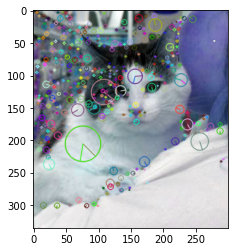

[[ 2.  6. 14. ...  0.  0. 23.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0. 11.]
 ...
 [24.  0.  0. ... 19. 15.  2.]
 [ 0.  0.  1. ...  0.  2. 10.]
 [ 0.  2.  1. ...  0.  0.  0.]]
(403, 128)


In [48]:
# Avec des sift
import cv2 as cv
import matplotlib.pyplot as plt

import os
dirname = os.path.dirname("__file__")
filename = os.path.join(dirname, 'data/DogCatChallenge/sample/train/cats/cat.4600.jpg') #394

img = cv.imread(filename, cv.IMREAD_UNCHANGED)
# gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)

sift = cv.SIFT_create()
# kp = sift.detect(img,None)
kp, des = sift.detectAndCompute(img,None)
# draw with keypoints information
img3=cv.drawKeypoints(img,kp,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img3), plt.show()
print(des)
print(des.shape)

In [49]:
# Perform k-means clustering

from sklearn.cluster import KMeans
# k = 100
k = 10
kmeans = KMeans(n_clusters = k, n_init=10)
kmeans.fit(train_descriptors)
visual_words = kmeans.cluster_centers_ 
visual_words

array([[26.604023 , 30.081976 , 27.716938 , ..., 11.574631 ,  9.457073 ,
        14.536737 ],
       [68.74468  , 53.47705  , 20.351622 , ...,  7.4311275,  9.546472 ,
        13.277716 ],
       [18.844088 , 18.360214 , 23.388168 , ..., 20.390322 , 17.813976 ,
        19.044086 ],
       ...,
       [18.343884 , 15.473625 , 12.981011 , ...,  3.242611 ,  3.4767914,
        13.562238 ],
       [25.422466 , 11.470239 ,  7.246436 , ...,  5.839057 ,  3.7661343,
         8.537298 ],
       [23.725708 ,  8.534482 ,  7.584635 , ..., 11.913794 ,  9.061127 ,
        13.216299 ]], dtype=float32)

At the end of this first step, you have build your vocabulary of visual words. You will now use the vocabulary in order to build a representation of each image as a bag of visual words, i.e. each image will be described as an histogram of visual words.

### BoVW pipeline 
Here you have to write the BoVW pipeline and to apply it to each image of the training dataset. 

In [56]:
############################### How do we know which feature vectors make up one image ????

def create_histo(descriptors_list):

    histo_list = [] 
    # print(len(descriptors))
    i = 0
    for des in descriptors_list:
        i += 1
        print(f"{i}/{len(descriptors_list)}")

        # print(des)
        # print(list(des))
        histo = np.zeros(len(visual_words))

        j = 0
        des_list1 = list(des)
        L = len(des_list1)
        for each_feature in des_list1: #associate each feature with its centroid and add 1 to the histogram
            j += 1
            if j%100 == 0:
                print(f"    {j}/{L}")
            # print(each_feature)
            index = kmeans.predict(each_feature.reshape(1, -1))
            histo[index] += 1


        histo_list.append(histo)
    histo_list = np.array(histo_list)
    return histo_list

train_histo_list = create_histo(train_list)
print(train_histo_list)
test_histo_list = create_histo(test_list)     


1/16
    100/172
2/16
    100/445
    200/445
    300/445
    400/445
3/16
    100/204
    200/204
4/16
    100/565
    200/565
    300/565
    400/565
    500/565
5/16
    100/552
    200/552
    300/552
    400/552
    500/552
6/16
    100/403
    200/403
    300/403
    400/403
7/16
    100/554
    200/554
    300/554
    400/554
    500/554
8/16
    100/649
    200/649
    300/649
    400/649
    500/649
    600/649
9/16
    100/1213
    200/1213
    300/1213
    400/1213
    500/1213
    600/1213
    700/1213
    800/1213
    900/1213
    1000/1213
    1100/1213
    1200/1213
10/16
    100/401
    200/401
    300/401
    400/401
11/16
    100/102
12/16
    100/2832
    200/2832
    300/2832
    400/2832
    500/2832
    600/2832
    700/2832
    800/2832
    900/2832
    1000/2832
    1100/2832
    1200/2832
    1300/2832
    1400/2832
    1500/2832
    1600/2832
    1700/2832
    1800/2832
    1900/2832
    2000/2832
    2100/2832
    2200/2832
    2300/2832
    2400/2832
    250

### Classification using the BoVW representation and linear SVMs

Now, your objective is to train and test a dog and cat classifier using the BoVW representation and SVMs. The good practices of the Part 0 have to be used. 
Some references :

 + [http://scikit-learn.org/stable/modules/svm.html](http://scikit-learn.org/stable/modules/svm.html)
 + [http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html](http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html)
 + [http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py)

In [58]:
from sklearn import svm
svmc = svm.SVC(random_state = 0, verbose = 5)
# params = {'C':[0.01,0.1,0.5,1,2,5,10], 'kernel':['linear','poly','rbf']}

svmc.fit(train_histo_list,train_labels)
pred = svmc.predict(test_histo_list)
acc = accuracy_score(test_labels,pred)
print(f"Accuracy : {acc}")


[LibSVM]Accuracy : 0.625


In [61]:
from sklearn import svm
svmc = svm.SVC(random_state = 0, verbose = 5)
params = {'C':[0.01,0.1,0.5,1,2,5,10, 15, 30], 'kernel':['linear','poly','rbf']}

clf = GridSearchCV(svmc,params,scoring = "accuracy", n_jobs = -1, verbose = 5)
X_train, X_test, y_train, y_test = X_train_hsv, X_test_hsv, y_train_hsv, y_test_hsv
clf.fit(train_histo_list,train_labels)
print(clf.best_params_)
acc = clf.score(test_histo_list, test_labels)
acc


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LibSVM]{'C': 10, 'kernel': 'rbf'}


0.75

#### Summary of Part 2

    
Introduction of classical **hand crafted feature representation** used in computer vision.
Knowledge on OpenCV.
Building of another **supervised machine learning basic pipeline** 
A important family of classifiers **SVMs**

You have finished the part 2 ! Complete the dashboard on the global MsTeams team.

## Part 3 : Using Convolutional Neural Networks

In this part, you are going to use convolutional neural networks (CNNs) and deep learning in order to build your image classifier. You will use the [Keras framework](https://keras.io/) which is a high-level neural networks API, written in Python and capable of running on top of [TensorFlow](https://www.tensorflow.org/), [CNTK](https://github.com/Microsoft/CNTK), or [Theano](http://www.deeplearning.net/software/theano/). It was developed with a focus on enabling fast experimentation and as a consequence it is a good choice for this course. Various other frameworks are available and can also be used such as [Caffe framework](http://caffe.berkeleyvision.org/), [Torch](http://torch.ch/) or [DeepLearning4j](https://deeplearning4j.org/) among others. Another important deep learning framework is [pytorch](https://pytorch.org/).


### Keras with sample data from the Dogs and cats recognition challenge

In this part, you will have to use Keras in order to
 + Build and train a small network from scratch
 + Use the bottleneck features of a pre-trained network
 + Fine-tune the top layers of a pre-trained network

The work will be done on a **sample dataset** (sampleDeep) of the initial Kaggle challenge that contains a training set composed of 1000 images of cats and 1000 images of dogs and a validation set, used to evaluate our models, that contains 400 additional samples from each class.

At the end, you could apply this approach on the whole dataset but it will imply to have other computing ressources than just your own computer.



#### Data preparation and loading

As for the previous classifiers, data preparation is also required when working with convolutional neural networks and deep learning models. You will use the [*ImageDataGenerator class*](https://keras.io/preprocessing/image/) that defines the configuration for image data preparation but also for data augmentation, a step often necessary for deep learning. In the code below, you will have to create and configure an `ImageDataGenerator` and to fit it on your data. In this example, we will use the sample dataset of the Dogs and Cats challenge. We consider that you have a training directory and a validation directory setup in this manner :

    train_dir/
        dog/
        cat/
    val_dir/
        dog/
        cat
 This is the case of the `sampleDeep` dataset.
 

Only few training examples are available in the `sampleDeep` dataset. In order to make the most of these training examples, a current approach is to **augment** them via a number of random transformations, so that our model would never see twice the exact same picture. This augmentation step helps prevent overfitting and helps the model generalize better.


Following is an example of what kind of images such a generator can produce (and then store in the preview folder)

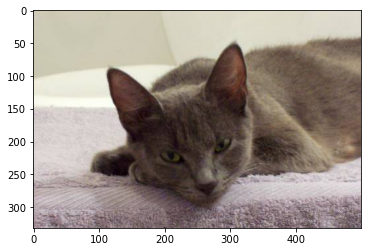

In [18]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

import os
dirname = os.path.dirname("__file__")
img_path = os.path.join(dirname, 'data/DogCatChallenge/sample/train/cats/cat.394.jpg')


img=io.imread(img_path)
imshow(img)

# img = load_img('data/train/cats/cat.0.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='preview', save_prefix='cat', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

In [2]:
# with augmentation 

from keras.preprocessing.image import ImageDataGenerator

# definition of the number of samples propagated through the network at each step
batch_size = 16

# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'data/DogCatChallenge/sampleDeep/train'
validation_data_dir = 'data/DogCatChallenge/sampleDeep/valid'

# Create and configure an ImageDataGenerator for the training data
# TO DO :  augmentation of the training data using rotation, horizontal and vertical shift, shearing tranformation, zooming 

train_datagen_deep = ImageDataGenerator(
    rotation_range=120,
    width_shift_range=0.6,
    height_shift_range=0.5,
    brightness_range=[0.2,1.0],
    shear_range=50,
    zoom_range=[0.5,1.0],
    rescale=1./255
)

# TO DO : Create and configure an ImageDataGenerator for the validation data
# Only rescaling for validation data

valid_datagen_deep = ImageDataGenerator(rescale = 1./255)

# TO DO : generator that will read pictures found in the train dataset directory and that will indefinitely generate
# batches of augmented image data

train_generator_deep = train_datagen_deep.flow_from_directory(
        train_data_dir,  # the target directory
        target_size=(img_width, img_height),  # all images will be resized to 150x150
        batch_size=batch_size) 

# TO DO : Similar generator for validation data

valid_generator_deep = valid_datagen_deep.flow_from_directory(
        validation_data_dir,  # the target directory
        target_size=(img_width, img_height),  # all images will be resized to 150x150
        batch_size=batch_size) 


Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


## Build a model from scratch

Models can be build easily with the Keras API. Here we will use the Sequential model API :
+ [https://keras.io/getting-started/sequential-model-guide/](https://keras.io/getting-started/sequential-model-guide/)


Here, you will build a convolutional neural network which is ,by design, one of the best models available for most "perceptual" problems (such as image classification), even with very little data to learn from.

In the code below, you have to build a model composed of 3 convolution layers with a ReLU activation and followed by max-pooling layers.
In order to write the code, have a look on the [documentation on the different kinds of layers available in Keras](https://keras.io/layers/about-keras-layers/)




In [22]:
%reload_ext tensorboard
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense


import tensorflow as tf
import datetime
import os

model = Sequential()

# First convolutional layer

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(4,4)))

# Second  convolutional layer

model.add(Conv2D(64, (5,5), activation='relu'))
# let's try without pooling to avid reducing the image size too much
 
# Third convolutional layer    

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))   # avoid overfitting

# Adding of two fully-connected layers 

model.add(Flatten())
model.add(Dense(512, activation='relu'))  # we could maybe have added even more units...
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.15))


# single unit and sigmoid activation, which is perfect for a binary classification. 

model.add(Dense(1))
model.add(Activation('sigmoid'))

# Use of the binary_crossentropy loss to train our model, of the rmsprop optimizer and the accuracy metrics
# from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam


model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)


### Visualizing a model

It may be sometimes useful to visualize in a schematic way a model architecture. You can do it with different approaches on Keras :

+ using the `plot_model` built-in function : see [this small tutorial](https://www.machinecurve.com/index.php/2019/10/07/how-to-visualize-a-model-with-keras/) or the [official documentation](https://keras.io/api/utils/model_plotting_utils/).
+ using [TensorBoard](https://www.tensorflow.org/tensorboard) if you are using the tensorflow backend on Keras. You can also find some documentations on this small [tutorial](https://www.machinecurve.com/index.php/2019/12/03/visualize-keras-models-overview-of-visualization-methods-tools/#visualizing-model-architecture-tensorboard)

In [23]:
from keras.utils.vis_utils import plot_model

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 33, 33, 64)        51264     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 31, 31, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 15, 15, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 28800)            

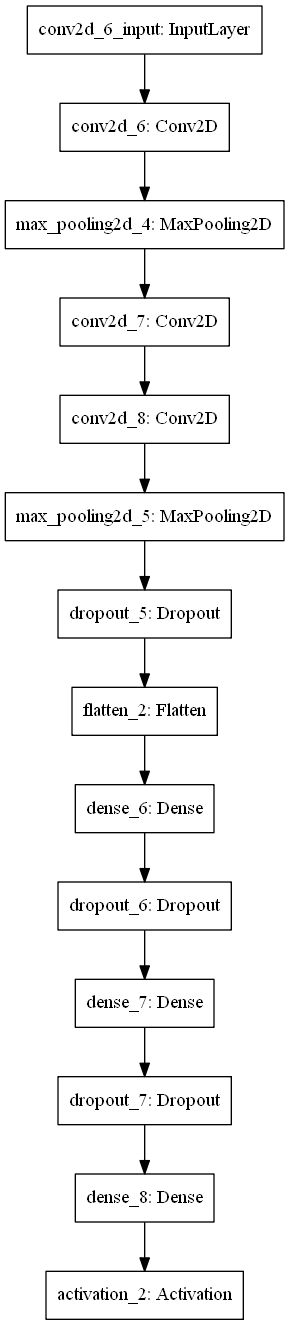

In [24]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='mymodel.png')

### Training a model

We can now use some defined generators to train your build model.

In [25]:
# with augmentation 

from keras.preprocessing.image import ImageDataGenerator

# definition of the number of samples propagated through the network at each step
batch_size = 16

# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'data/DogCatChallenge/sampleDeep/train'
validation_data_dir = 'data/DogCatChallenge/sampleDeep/valid'

# augmentation configuration use for training:
# Our original images consist in RGB coefficients in the 0-255, but such values would be 
# too high for our models to process (given a typical learning rate),
# so we target values between 0 and 1 instead by scaling with a 1/255 factor.

train_datagen = ImageDataGenerator(
    rescale=1. / 255, 
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# augmentation configuration use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
    train_data_dir, # this is the target directory
    target_size=(img_width, img_height), # all images will be resized to 150x150
    batch_size=batch_size,
    class_mode='binary') # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')


# fit the generator to your data
history = model.fit(
    train_generator,
    steps_per_epoch = 20,
    epochs = 50,   # étant donné qu'on a peu de données...
    verbose = 1,
    validation_data = validation_generator,
    callbacks=[tensorboard_callback]
)

# saving the learned model
model.save_weights('first_try.h5')

%reload_ext tensorboard
%tensorboard --logdir logs

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Epoch 1/50
20/20 [==============================] - 18s 788ms/step - loss: 0.7073 - accuracy: 0.4469 - val_loss: 0.6900 - val_accuracy: 0.5725
Epoch 2/50
20/20 [==============================] - 12s 602ms/step - loss: 0.6922 - accuracy: 0.5156 - val_loss: 0.6887 - val_accuracy: 0.5000
Epoch 3/50
20/20 [==============================] - 12s 600ms/step - loss: 0.6881 - accuracy: 0.5281 - val_loss: 0.6869 - val_accuracy: 0.5013
Epoch 4/50
20/20 [==============================] - 13s 653ms/step - loss: 0.6863 - accuracy: 0.5437 - val_loss: 0.6765 - val_accuracy: 0.5913
Epoch 5/50
20/20 [==============================] - 12s 616ms/step - loss: 0.6893 - accuracy: 0.5219 - val_loss: 0.6769 - val_accuracy: 0.5225
Epoch 6/50
20/20 [==============================] - 12s 607ms/step - loss: 0.6765 - accuracy: 0.5969 - val_loss: 0.6642 - val_accuracy: 0.6075
Epoch 7/50
20/20 [==============================] - 12s 596

Reusing TensorBoard on port 6006 (pid 27268), started 19:28:52 ago. (Use '!kill 27268' to kill it.)

#### Carefully have a look on the results and on the diffferent metrics and their obtained values. What is your interpretation of the results ?

You can now apply this model to any new image. For instance, in the code below, you have to apply the model on different images of the test dataset. 

Prediction


'Cat'

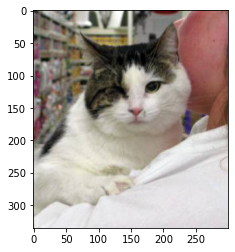

In [29]:
%matplotlib inline

from skimage import data, io
from matplotlib.pyplot import imshow
from keras.preprocessing import image
import numpy as np

# img_path = 'data/DogCatChallenge/test1/10001.jpg'

import os
dirname = os.path.dirname("__file__")
img_path = os.path.join(dirname, 'data/DogCatChallenge/sample/train/cats/cat.4600.jpg')


ima=io.imread(img_path)
imshow(ima)

# image loading and transformation to keras
image = image.img_to_array(image.load_img(img_path, target_size=(img_width, img_height))) / 255
single_im = np.expand_dims(image, axis=0)

# prediction on the image
print("Prediction")

pred = model.predict(single_im)[0]
final_pred = "Cat" if pred<0.5 else "Dog"
final_pred

## Use a pretrained Convnet model

In practice, very few people train an entire Convolutional Network from scratch (with random initialization), because it is relatively rare to have a dataset of sufficient size. Instead, in image classification, it is common to use networks pre-trained on a large dataset (such as ImageNet)  and to use it either as an initialization of as a fixed feature extractor for the task of interest (**transfer learning**). Indeed, these networks have already learned features that are useful for most computer vision problems, and leveraging such features would allow us to reach a better accuracy than any method that would only rely on the available data.

Different strategies can be used in transfer learning scenarios :

1. The ConvNet, trained on a large image dataset such as Imagenet, is used as a fixed feature extractor. In this case, the pipeline consists in taking the pre-trained ConvNet, removing the last fully connected layer and that by treating the rest of the ConvNet architecture as a fixed feature extractor for the new dataset
2. Fine Tuning of the ConvNet. In this case,  the weights of a part of the pretrained network are fine-tuned by continuing the backpropagation. As it as been observed that the first features of a ConvNet contain more generic features (e.g. edge detectors or color blob detectors) that should be useful to many tasks and that later layers become progressively more specific to the details of the classes contained in the original dataset, only a higher portion of the network is fine-tuned.


### ConvNet as a fixed feature extractor   

In our case, the ImageNet dataset contains several "cat" classes (persian cat, siamese cat...) and many "dog" classes among its total of 1000 classes. As a consequence any model pre-trained on ImageNet will already have learned features that are relevant to our classification problem. 

In particular, we will use the VGG16 architecture which won the 2014 Imagenet competition, and is a very simple model to create and understand. The VGG Imagenet team created both a larger, slower, slightly more accurate model (VGG 19) and a smaller, faster model (VGG 16). We will be using VGG 16 since the much slower performance of VGG19 is generally not worth the very minor improvement in accuracy.

![VGG16](images/vgg16.png)

Source : [https://blog.heuritech.com/2016/02/29/a-brief-report-of-the-heuritech-deep-learning-meetup-5/](https://blog.heuritech.com/2016/02/29/a-brief-report-of-the-heuritech-deep-learning-meetup-5/)

In the code below, the strategy will consist in instantiating only the convolutional part of the model (using the *include_top* argument) (see the [Keras documentation on VGG16](https://keras.io/applications/#vgg16)) and in running this model on our own training and validation data once by recording the output in two numpy arrays. Then, you will train a small fully-connected model on top of the stored features.

Some references :
 + VGG models : [http://www.robots.ox.ac.uk/~vgg/research/very_deep/](http://www.robots.ox.ac.uk/~vgg/research/very_deep/)
 



In [59]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.applications.vgg16 import VGG16


# dimensions of our images.
img_width, img_height = 150, 150

top_model_weights_path = 'bottleneck_fc_model.h5'
train_data_dir = 'data/DogCatChallenge/sampleDeep/train'
validation_data_dir = 'data/DogCatChallenge/sampleDeep/valid'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16


# Function that instanciates the convolutional part of the VGG16 pre-trained model on Imagenet and that runs it on our training and validation data

def save_bottleneck_features():
    datagen = ImageDataGenerator(rescale=1. / 255)

    # build and load the VGG16 network without the fully connected layers
    model = VGG16(
        include_top=False, #remove the top fully-connected NN
        weights="imagenet")

    # preparation of the training data
    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None, # this means our generator will only yield batches of data, no labels
        shuffle=False) # our data will be in order, so all first 1000 images will be cats, then 1000 dogs
# the predict_generator method returns the output of a model, given
# a generator that yields batches of numpy data
    
    # Generation of the predictions for the input samples from the training data generator and return them as a numpy array that we can saved
    bottleneck_features_train = model.predict(generator)  #nb_train_samples#
    # save the output as a Numpy array
    np.save(open('bottleneck_features_train.npy', 'wb'),
            bottleneck_features_train)

    # preparation of the validation data
    
    generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        #batch_size=batch_size,######
        class_mode=None,
        shuffle=False)
    
    # Generation of the predictions for the input samples from the validation data generator and return them as a numpy array that we can saved
    bottleneck_features_validation = model.predict(generator) #nb_validation_samples#
    np.save(open('bottleneck_features_validation.npy', 'wb'),
            bottleneck_features_validation)

    
# Function that trains a small fully-connected model on top of the stored previous features

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
    
def train_top_model():
    train_data = np.load(open('bottleneck_features_train.npy','rb'))
    train_labels = np.array(
        [0] * (nb_train_samples // 2) + [1] * (nb_train_samples // 2))

    validation_data = np.load(open('bottleneck_features_validation.npy','rb'))
    validation_labels = np.array(
        [0] * (nb_validation_samples // 2) + [1] * (nb_validation_samples // 2))

    # Building of the small fully-connected model
    
    model = Sequential()
    model.add(Flatten(input_shape=train_data.shape[1:]))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    # model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    # Configuration of the learning process
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy', metrics=['accuracy'])

    # Training of the model
    history = model.fit(train_data,
            train_labels, 
            epochs=epochs,
            batch_size=batch_size, 
            steps_per_epoch = 20, ################
            validation_data=(validation_data,validation_labels), 
            callbacks=[tensorboard_callback],
            verbose=2)
    
    model.save('bottleneck_fc_model') 

In [55]:
save_bottleneck_features()

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [60]:
train_top_model()

%reload_ext tensorboard
%tensorboard --logdir logs

Epoch 1/50
20/20 - 4s - loss: 1.4300 - accuracy: 0.5813 - val_loss: 0.9157 - val_accuracy: 0.5537
Epoch 2/50
20/20 - 2s - loss: 0.6195 - accuracy: 0.7375 - val_loss: 0.3987 - val_accuracy: 0.8087
Epoch 3/50
20/20 - 1s - loss: 0.4789 - accuracy: 0.7500 - val_loss: 0.3169 - val_accuracy: 0.8687
Epoch 4/50
20/20 - 1s - loss: 0.5572 - accuracy: 0.7875 - val_loss: 0.3108 - val_accuracy: 0.8675
Epoch 5/50
20/20 - 1s - loss: 0.3588 - accuracy: 0.8562 - val_loss: 0.3193 - val_accuracy: 0.8462
Epoch 6/50
20/20 - 1s - loss: 0.3933 - accuracy: 0.8438 - val_loss: 0.3930 - val_accuracy: 0.8138
Epoch 7/50
20/20 - 1s - loss: 0.3608 - accuracy: 0.8438 - val_loss: 0.2847 - val_accuracy: 0.8737
Epoch 8/50
20/20 - 1s - loss: 0.3410 - accuracy: 0.8656 - val_loss: 0.2663 - val_accuracy: 0.8850
Epoch 9/50
20/20 - 1s - loss: 0.2454 - accuracy: 0.9062 - val_loss: 0.3922 - val_accuracy: 0.8338
Epoch 10/50
20/20 - 1s - loss: 0.3544 - accuracy: 0.8438 - val_loss: 0.4210 - val_accuracy: 0.8300
Epoch 11/50
20/20 -

Reusing TensorBoard on port 6006 (pid 27268), started 23:50:18 ago. (Use '!kill 27268' to kill it.)

#### Carefully have a look on the results and on the diffferent metrics and their obtained values. What is your interpretation of the results ?
Try to apply this model of some unknown images, even images without dogs ar cats.

## Fine-tuning the top layers of a a pre-trained network

We will now try to "fine-tune" the last convolutional block of the VGG16 model. It consist in starting from a trained network (the VGG16 network), then re-training it on a new dataset using very small weight updates. In our case, this can be done in 3 steps:
+ Instantiate the convolutional base of VGG16 and load its weights.
+ Add our previously defined fully-connected model on top, and load its weights.
+ Freeze the layers of the VGG16 model up to the last convolutional block


In [62]:
from keras.applications.vgg16 import VGG16
from keras import backend
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
import keras


# path to the model weights files.
weights_path = '../keras/examples/vgg16_weights.h5'
top_model_weights_path = 'bottleneck_fc_model.h5'
# dimensions of our images.
img_width, img_height = 150, 150
# keras.backend.set_image_dim_ordering('tf')
backend.image_data_format()

train_data_dir = 'data/DogCatChallenge/sampleDeep/train'
validation_data_dir = 'data/DogCatChallenge/sampleDeep/valid'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 10 #50
batch_size = 16

# creation of the base VGG pre-trained model
model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height,3))
print('Model loaded.')

# # build a classifier model to put on top of the convolutional model
# top_model = Sequential()
# top_model.add(Flatten())
# top_model.add(Dense(256, activation='relu'))
# top_model.add(Dropout(0.5))
# top_model.add(Dense(128, activation='relu'))
# top_model.add(Dropout(0.25))
# top_model.add(Dense(1, activation='sigmoid'))

# # note that it is necessary to start with a fully-trained
# # classifier, including the top classifier,
# # in order to successfully do fine-tuning
# top_model.load_weights(top_model_weights_path)

#fetch the previously trained classifier
top_model = keras.models.load_model('bottleneck_fc_model')


# creation of a real model from vgg
new_model = Sequential()
for l in model.layers:
    new_model.add(l)


# concatenation of the base model with the top model
new_model.add(top_model)


# set the first 25 layers (up to the last conv block)
# to non-trainable (weights will not be updated)

###################

# for layer in new_model.layers[:25]:
#    layer.trainable = False

###################

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
new_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(learning_rate=1e-4, momentum=0.9),
              metrics=['accuracy'])

# prepare data augmentation configuration
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

# fine-tune the model

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

history = new_model.fit(
        train_generator,
        steps_per_epoch=20, #nb_train_samples // batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        batch_size = batch_size,
        ####### validation_steps=nb_validation_samples // batch_size,
        callbacks=[tensorboard_callback],
        verbose=2)

        
%reload_ext tensorboard
%tensorboard --logdir logs


Model loaded.
Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Epoch 1/10
20/20 - 75s - loss: 0.3044 - accuracy: 0.8750 - val_loss: 0.4685 - val_accuracy: 0.7950
Epoch 2/10
20/20 - 72s - loss: 0.3894 - accuracy: 0.8281 - val_loss: 0.2978 - val_accuracy: 0.8875
Epoch 3/10
20/20 - 76s - loss: 0.3169 - accuracy: 0.8750 - val_loss: 0.3193 - val_accuracy: 0.8888
Epoch 4/10
20/20 - 72s - loss: 0.2102 - accuracy: 0.9250 - val_loss: 0.2351 - val_accuracy: 0.9112
Epoch 5/10
20/20 - 76s - loss: 0.1662 - accuracy: 0.9500 - val_loss: 0.2589 - val_accuracy: 0.9237
Epoch 6/10
20/20 - 74s - loss: 0.1313 - accuracy: 0.9469 - val_loss: 0.2488 - val_accuracy: 0.9137
Epoch 7/10
20/20 - 71s - loss: 0.1633 - accuracy: 0.9438 - val_loss: 0.2247 - val_accuracy: 0.9125
Epoch 8/10
20/20 - 80s - loss: 0.2350 - accuracy: 0.9125 - val_loss: 0.1954 - val_accuracy: 0.9187
Epoch 9/10
20/20 - 100s - loss: 0.1289 - accuracy: 0.9563 - val_loss: 0.2104 - val_accuracy: 0.9325
Epoch 10/10

Reusing TensorBoard on port 6006 (pid 27268), started 1 day, 0:14:10 ago. (Use '!kill 27268' to kill it.)

#### Carefully have a look on the results and on the diffferent metrics and their obtained values. What is your interpretation of the results ?
Try to apply this model of some unknown images, even images without dogs ar cats.

#### Summary of Part 3

    
Introduction to representation learning.

Introduction to deep learning and CNN.

Practice on Keras

Introduction to transfer learning and fine tuning

You have finished the part 2 ! Complete the dashboard on the global MsTeams team.

## Opening the black box [Optional]

Deep neural network models are often considered as  black-boxes and their performances come at the price of loss of interpretability. Indeed, they fail to provide explanations on their predictions. In high-risk domains, e.g., health care, or in a context of production, it is crucial to build trust in a model and being able to understand its behavior. This sub-fied of artificial intelligence is known as XAI (eXplainable Artificial Intelligence) (see for instance this [tutorial](https://sites.google.com/view/www20-explainable-ai-tutorial) or the DARPA initiative [here](https://www.darpa.mil/attachments/XAIProgramUpdate.pdf)).

In particular different approaches are now well established as tools to explain a model or a model decision. You can test them on your different classification models.



#### Activation Maximization

See this [tutorial](https://www.machinecurve.com/index.php/2019/11/18/visualizing-keras-model-inputs-with-activation-maximization/) to test it on your models.


In [ ]:
# TO DO
# Activation maximization on your models.




#### Saliency maps

See this [tutorial](https://www.machinecurve.com/index.php/2019/11/25/visualizing-keras-cnn-attention-saliency-maps/) to test it.

In [ ]:
# TO DO
# Saliency maps on your models.

If you are interested to go deeper, a very nice tutorial is available [here](https://interpretablevision.github.io/)

# Part 4 : Your turn on a more challenging case

Do the same job but this time on the PET Dataset : [http://www.robots.ox.ac.uk/~vgg/data/pets/](http://www.robots.ox.ac.uk/~vgg/data/pets/) which contains 37 category of pets with roughly 200 images for each class.

# Sources and references

+ This study case is inpired from the Lesson 1 of the fast.ai's online course, Practical Deep Learning For Coders : [http://course.fast.ai/](http://course.fast.ai/)
+ Others sources :
    + Stanford CS231n course on Convolutional Neural Networks for Visual Recognition : [http://cs231n.stanford.edu/](http://cs231n.stanford.edu/)
    + Keras blog post on building image classification models [here](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)